In [63]:
import os
import pandas as pd
import scanpy as sc
import anndata as ad
import numpy as np

In [2]:
st_folder = 'D:Robin/Single_seq_data'
st_ad_fname = os.path.join(st_folder,'R1_R3_counts_ad')

In [6]:
st_ad = ad.read_h5ad(st_ad_fname)

In [7]:
st_ad

AnnData object with n_obs × n_vars = 2308 × 17822
    obs: 'louvain', 'no_num'

In [20]:
sc.pp.scale(st_ad)
sc.tl.pca(st_ad, svd_solver='arpack', n_comps=30)
#sc.pp.pca(st_ad)
sc.pp.neighbors(st_ad)


C:\Users\rattey\AppData\Roaming\Python\Python37\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\rattey\AppData\Roaming\Python\Python37\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities


C:\Users\rattey\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


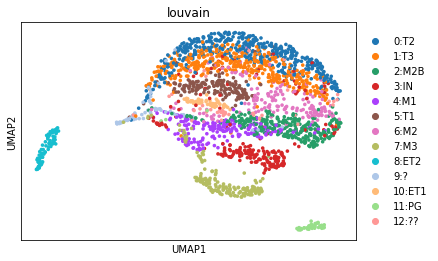

In [21]:
sc.tl.umap(st_ad)
sc.pl.umap(st_ad, color="louvain")

In [47]:
mitral = st_ad[[index for index in st_ad.obs.index if st_ad.obs.loc[index,'louvain'] in ['4:M1','6:M2','2:M2B','7:M3']]]

In [44]:
mitral.X

array([[-0.67133623, -1.1548887 , -0.14256273, ..., -1.1624762 ,
        -0.3756156 , -0.31806588],
       [-0.37992552, -0.909355  , -0.14256273, ..., -1.1624762 ,
         1.4994087 , -0.31806588],
       [ 3.8163888 ,  2.0370512 , -0.14256273, ..., -0.49739945,
         1.4994087 , -0.31806588],
       ...,
       [-0.64219517,  0.07278037, -0.14256273, ...,  0.03466198,
        -0.3756156 , -0.31806588],
       [-0.49648982,  1.7915174 , -0.14256273, ...,  0.6997388 ,
        -0.3756156 , -0.31806588],
       [-0.6130541 , -1.1548887 , -0.14256273, ..., -1.4285069 ,
        -0.3756156 , -0.31806588]], dtype=float32)

In [51]:
sc.pp.scale(mitral)
#sc.tl.pca(mitral, svd_solver='arpack', n_comps=30)
#sc.pp.pca(mitral)
sc.pp.neighbors(mitral)


C:\Users\rattey\AppData\Roaming\Python\Python37\site-packages\scanpy\neighbors\__init__.py:121: FutureWarning: This location for 'distances' is deprecated. It has been moved to .obsp[distances], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['distances'] = neighbors.distances
C:\Users\rattey\AppData\Roaming\Python\Python37\site-packages\scanpy\neighbors\__init__.py:122: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'] = neighbors.connectivities


C:\Users\rattey\AppData\Roaming\Python\Python37\site-packages\scanpy\tools\_umap.py:147: FutureWarning: This location for 'connectivities' is deprecated. It has been moved to .obsp[connectivities], and will not be accesible here in a future version of anndata.
  adata.uns['neighbors']['connectivities'].tocoo(),


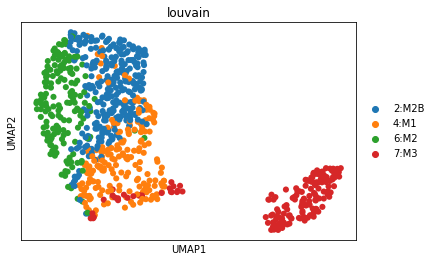

In [52]:
sc.tl.umap(mitral)
sc.pl.umap(mitral, color="louvain")

In [53]:
input = os.path.join(st_folder,'GO_axon_guidance.csv')
go_table = pd.read_csv(input)

In [57]:
go_list = [x for x in go_table['Symbol'].unique() if x in st_ad.var.index]

In [59]:
len(go_list)

196

In [ ]:
#filter go_list by if expressed highly in at least one cell

In [68]:
len(np.sum(mitral.X, axis=0))

17822

In [118]:
# Computing in how many cells a gene is found
mitral.var['n_cells'] = np.sum(mitral.X > 2, axis=0)
#mitral.var['n_cells'] = np.count_nonzero(mitral.X > 0,axis=0)

C:\tools\Anaconda3\envs\robin_scvi\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [137]:
expressed_go_list = [gene for gene in go_list if mitral.var.loc[gene,'n_cells'] > 40]

In [138]:
len(expressed_go_list)

55

In [ ]:
sc.pl.umap(mitral, color=go_list)

In [119]:
mitral.var

n_cells
Xkr4                 35
Gm1992               31
Gm37381              17
Rp1                  69
Mrpl15               43
...                 ...
Csprs                10
AC125149.3            8
AC149090.1           34
CAAA01118383.1       33
eGFP                 51

[17822 rows x 1 columns]

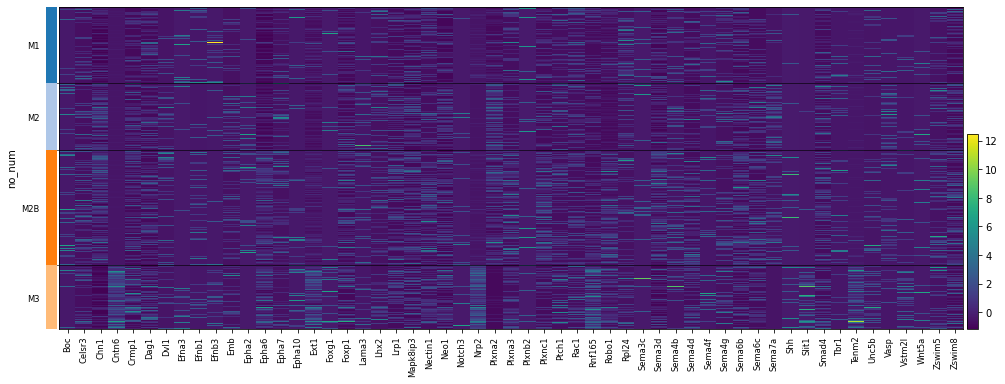

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 16.5, 0, 0.2])

In [139]:
sc.pl.heatmap(mitral,expressed_go_list,groupby='no_num',show_gene_labels=True)

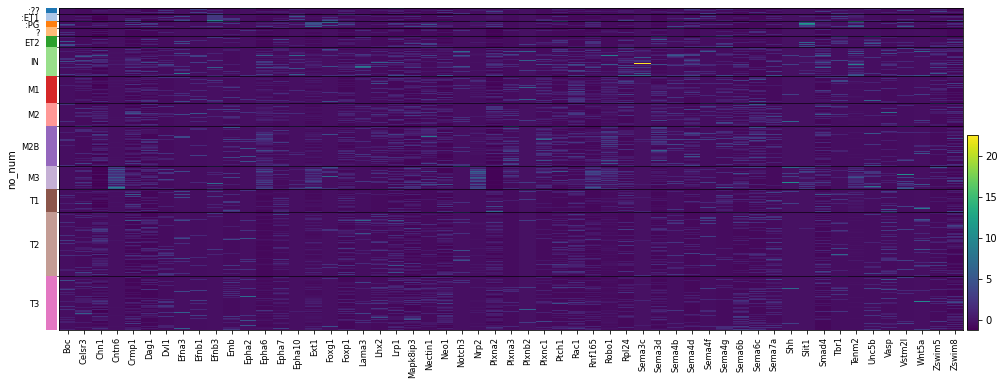

GridSpec(2, 4, height_ratios=[0, 6], width_ratios=[0.2, 16.5, 0, 0.2])

In [132]:
sc.pl.heatmap(st_ad,expressed_go_list,groupby='no_num',show_gene_labels=True)

In [133]:
expressed_go_list

['Boc',
 'Celsr3',
 'Chn1',
 'Cntn6',
 'Crmp1',
 'Dag1',
 'Dvl1',
 'Efna3',
 'Efnb1',
 'Efnb3',
 'Emb',
 'Epha2',
 'Epha6',
 'Epha7',
 'Epha10',
 'Ext1',
 'Foxg1',
 'Foxp1',
 'Lama3',
 'Lhx2',
 'Lrp1',
 'Mapk8ip3',
 'Nectin1',
 'Neo1',
 'Notch3',
 'Nrp2',
 'Plxna2',
 'Plxna3',
 'Plxnb2',
 'Plxnc1',
 'Ptch1',
 'Rac1',
 'Rnf165',
 'Robo1',
 'Rpl24',
 'Sema3c',
 'Sema3d',
 'Sema4b',
 'Sema4d',
 'Sema4f',
 'Sema4g',
 'Sema6b',
 'Sema6c',
 'Sema7a',
 'Shh',
 'Slit1',
 'Smad4',
 'Tbr1',
 'Tenm2',
 'Unc5b',
 'Vasp',
 'Vstm2l',
 'Wnt5a',
 'Zswim5',
 'Zswim8']